# AIM to summarize the nonTCGA Exac and ALL
***
## Make a sumamry table of genes and their frequency in 


|summary |CAYA |nonTCGA| Known/Candidate |  |
|---|---|---|---|---|
|g1| # of variants for g1 in ALL / 1507 *2 | # of variants for g1 in nonExac / 53105 *2 | |
|g2|# of variants for g1 in ALL / 1507 *2| # of variants for g1 in nonExac / 53105 *2| |
|...|||

***

- Use nonTCGA_ExAC_All_040819_GeneticAnalysis_062019.xls
- Use Mutation_data_cleaned_051019.xls

In [1]:
import pandas as pd
import pandas_profiling as pp
import pandas_flavor as pf
import numpy as np
import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.display import display, HTML

## Load nonTCGA ExAC Data file

In [2]:
mut_fp = "data/nonTCGA_ExAC_All_040819_GeneticAnalysis_062019.xlsx"
df = pd.read_excel(mut_fp)

In [3]:
df.shape

(35425, 78)

In [4]:
df.Hugo_Symbol.unique().size

2124

In [50]:
collector = []
for e,i in enumerate( df.Hugo_Symbol.tolist() ):
    lnx = df.loc[e].to_dict()
    nX =i.split('; ')
    if len(nX) >1 :
        for x in nX :
            lnx = df.loc[e].to_dict()
            #print( '>>', e,lnx.get('Hugo_Symbol'), x )
            lnx.update({'Hugo_Symbol': x })
            #print( '>>>',e, lnx.get('Hugo_Symbol'), x )
            collector.append(lnx)
    else :
        collector.append(lnx)
        #print( '>',e, lnx.get('Hugo_Symbol') )

dfX = pd.DataFrame( collector )
dfX = dfX[df.columns.tolist()]

In [51]:
dfX.shape

(44506, 78)

In [61]:
df_mut_freq =dfX.Hugo_Symbol.value_counts() / (53105 * 2)

In [62]:
df_mut_freq.size

2375

In [63]:
df_mut_freq.name = "nonTCGAExAC"

## Load CCF Mutation Data file

In [64]:
mut_fp2 = "data/Mutation_data_cleaned_051019.xls"
ccfdf = pd.read_excel(mut_fp2)

In [65]:
ccfdf.shape

(3016, 84)

In [66]:
ccfdf.Hugo_Symbol.unique().size

1258

In [67]:
ccfdf_mut_freq =ccfdf.Hugo_Symbol.value_counts() / (1507 *2)

In [68]:
ccfdf_mut_freq.size

1258

In [69]:
ccfdf_mut_freq.name = "CAYA"

## Combine the data

In [70]:
joined_df = pd.concat([ ccfdf_mut_freq, df_mut_freq ], axis=1,sort=False)

In [71]:
joined_df.head()

,CAYA,nonTCGAExAC
RB1,0.010617,0.000264
PRKN,0.007631,0.000377
NF1,0.007299,0.000932
CHEK2,0.006304,0.000452
PAH,0.005972,0.001007


In [72]:
joined_df.fillna(0, inplace=True)

In [73]:
( joined_df.CAYA > joined_df.nonTCGAExAC ).value_counts()

False    1230
True     1181
dtype: int64

In [74]:
joined_df[(joined_df.CAYA > joined_df.nonTCGAExAC)].head(10)

,CAYA,nonTCGAExAC
RB1,0.010617,0.000264
PRKN,0.007631,0.000377
NF1,0.007299,0.000932
CHEK2,0.006304,0.000452
PAH,0.005972,0.001007
TTN,0.005972,0.002872
TYR,0.005640,0.000772
TMPRSS3,0.005309,0.000301
EYS,0.005309,0.000593
ABCA3,0.004977,0.001158


In [75]:
# Sanity Check

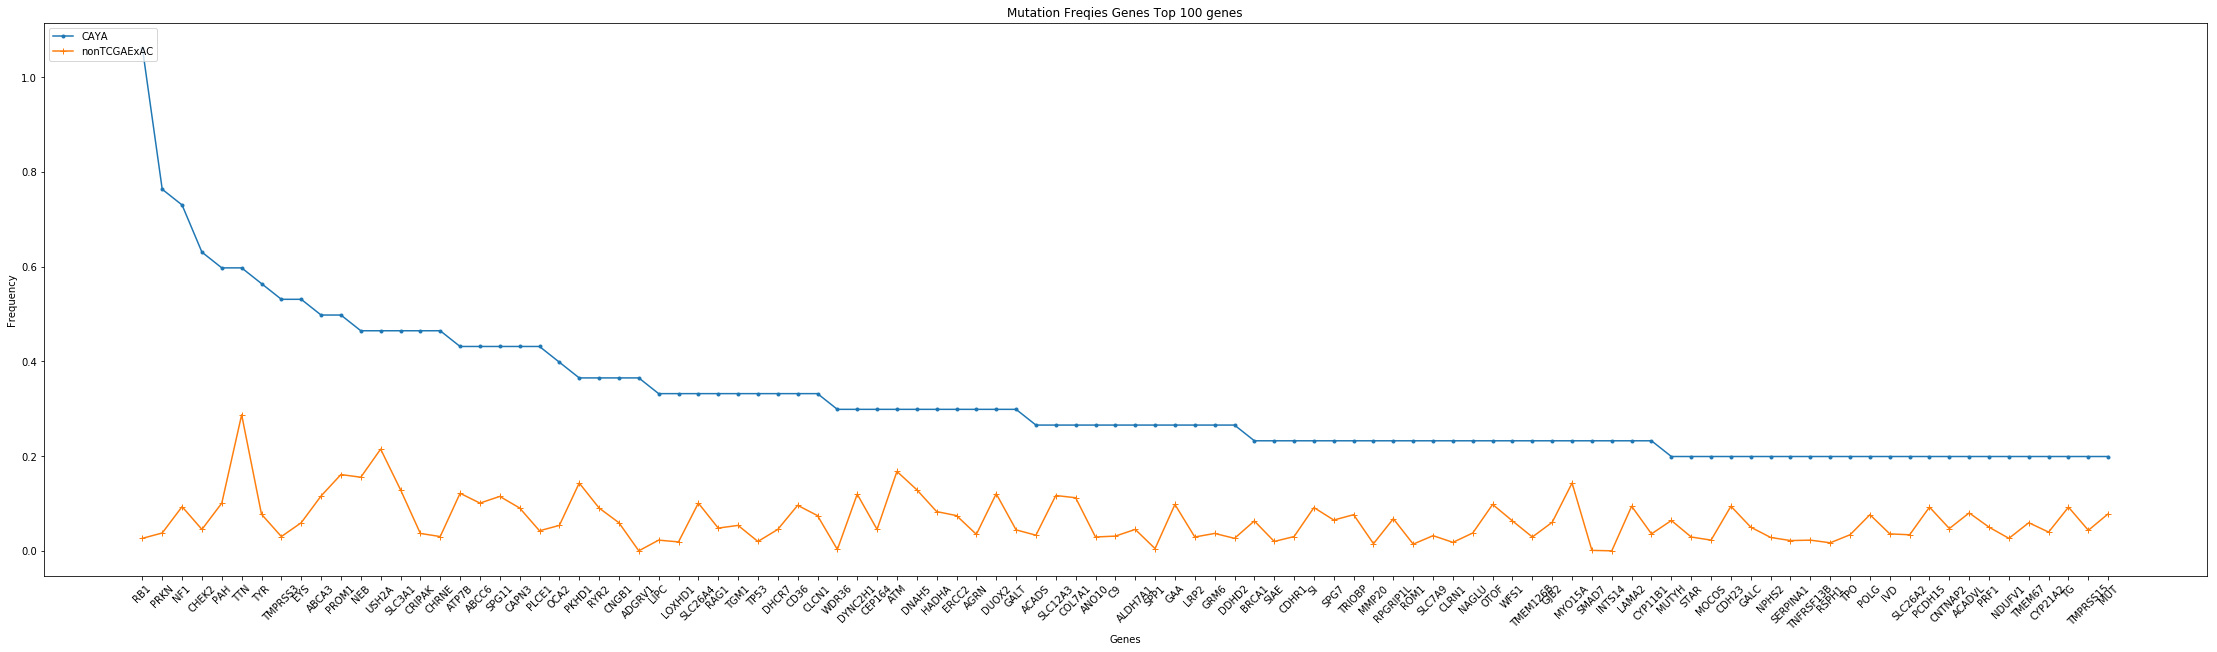

In [76]:
dfx=joined_df.head(100)
a4_dims = (30.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax1 = plt.plot(dfx.CAYA *100, label="CAYA", marker='.');
ax2 = plt.plot(dfx.nonTCGAExAC *100 , label="nonTCGAExAC", marker='+');
plt.tight_layout();
labels=['CAYA','nonTCGAExAC']
locs, labs = plt.xticks();
plt.legend(loc='upper left')
plt.setp(labs, rotation=45);
plt.xlabel("Genes");
plt.ylabel("Frequency");
ax.set_yscale('linear')
ax.set(title="Mutation Freqies Genes Top 100 genes");

In [77]:
joined_df.tail()

,CAYA,nonTCGAExAC
AC067969.1,0.0,0.000009
RP11-589N15.2,0.0,0.000009
RN7SL861P,0.0,0.000009
LLGL2,0.0,0.000009
RP11-452H21.1,0.0,0.000009


In [82]:
joined_df_only_in_caya = joined_df[ joined_df.index.isin( ccfdf.Hugo_Symbol.unique() ) ]

In [83]:
joined_df_only_in_caya.shape

(1258, 2)

In [84]:
( joined_df_only_in_caya.CAYA > joined_df_only_in_caya.nonTCGAExAC ).value_counts()

True     1181
False      77
dtype: int64

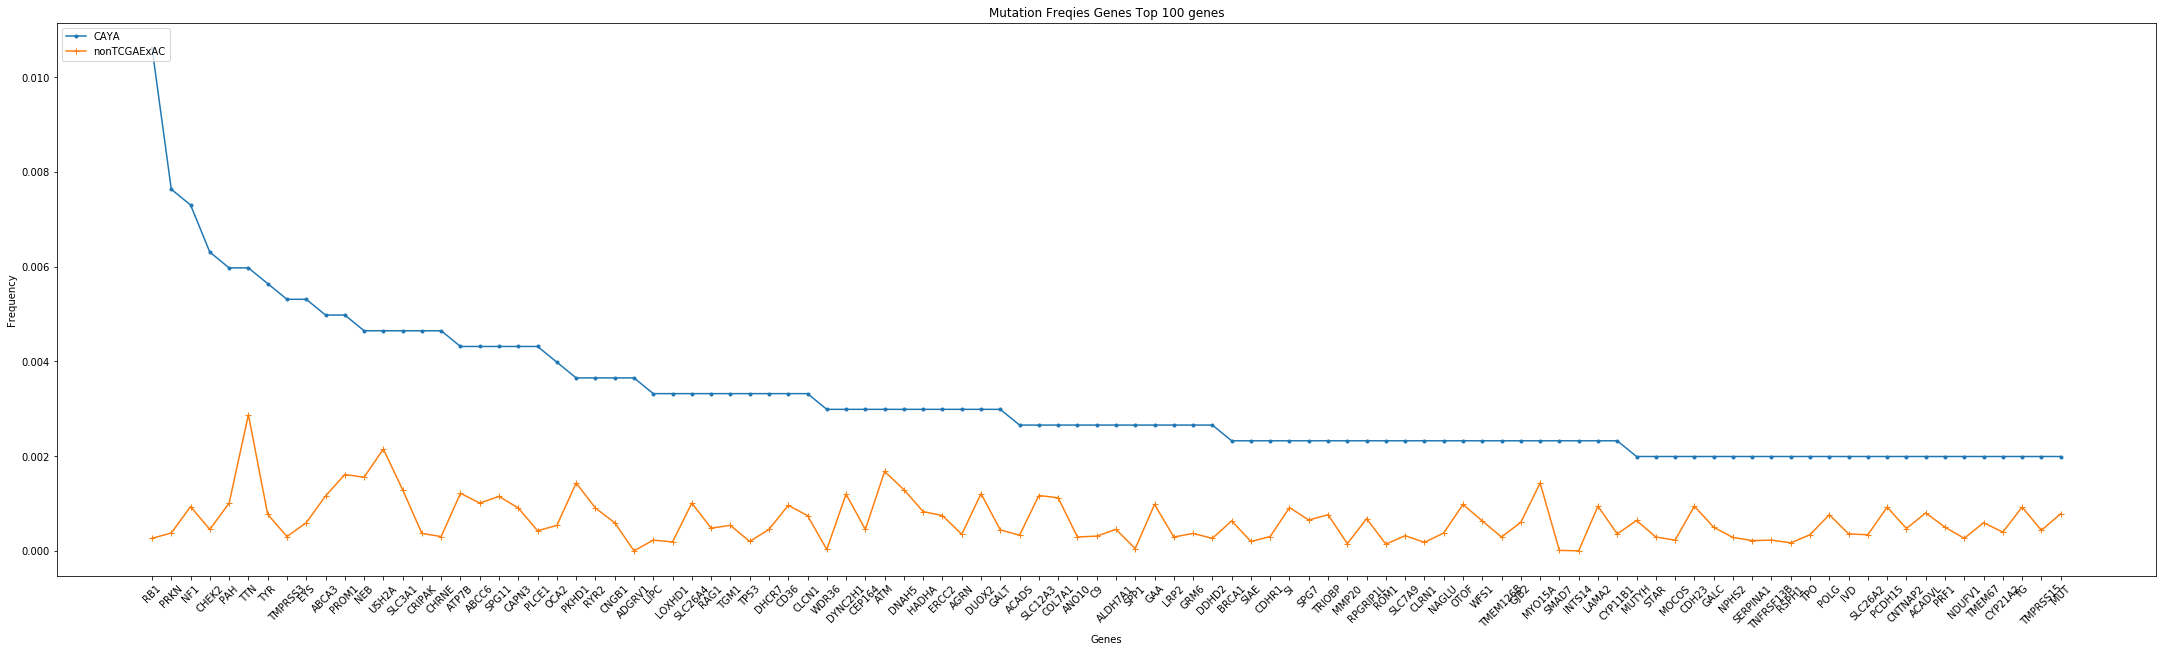

In [91]:
dfx=joined_df_only_in_caya.head(100)
a4_dims = (30, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
ax1 = plt.plot(dfx.CAYA , label="CAYA", marker='.');
ax2 = plt.plot(dfx.nonTCGAExAC  , label="nonTCGAExAC", marker='+');
plt.tight_layout();
labels=['CAYA','nonTCGAExAC']
locs, labs = plt.xticks();
plt.legend(loc='upper left')
plt.setp(labs, rotation=45);
plt.xlabel("Genes");
plt.ylabel("Frequency");
ax.set_yscale('linear')
ax.set(title="Mutation Freqies Genes Top 100 genes");

In [174]:
ccfdf_ss = ccfdf[["Hugo_Symbol",  "Known_Cancer_Predisposition_Genes"]]

In [175]:
ccfdf_ss.drop_duplicates(inplace=True)

/home/padmanr/.virtualenvs/p3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [176]:
ccfdf_ss.set_index("Hugo_Symbol", inplace=True)

In [177]:
ccfdf_ss.sort_index(inplace=True)

/home/padmanr/.virtualenvs/p3/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [178]:
ccfdf_ss.shape

(1258, 1)

In [179]:
joined_df_only_in_caya.sort_index(inplace=True)

In [181]:
joined_df_only_in_caya_02 = pd.concat([joined_df_only_in_caya, ccfdf_ss], axis=1)

In [182]:
joined_df_only_in_caya_02.shape

(1258, 3)

In [190]:
joined_df_only_in_caya_02.sort_values('CAYA', ascending=False, inplace=True)

In [191]:
joined_df_only_in_caya_02.head()

,CAYA,nonTCGAExAC,Known_Cancer_Predisposition_Genes
Hugo_Symbol,,,
RB1,0.010617,0.000264,known
PRKN,0.007631,0.000377,suggesting
NF1,0.007299,0.000932,known
CHEK2,0.006304,0.000452,known
PAH,0.005972,0.001007,suggesting


In [213]:
joined_df_only_in_caya_02["freq_more"] = [ 0 if i == True else 1 for i in joined_df_only_in_caya_02.CAYA > joined_df_only_in_caya_02.nonTCGAExAC ]

In [214]:
joined_df_only_in_caya_02.tail()

,CAYA,nonTCGAExAC,Known_Cancer_Predisposition_Genes,freq_more
Hugo_Symbol,,,,
HLCS,0.000332,0.000348,suggesting,1
HMCN1,0.000332,0.000471,suggesting,1
HMGCL,0.000332,0.000160,suggesting,0
HMGCS2,0.000332,0.000207,suggesting,0
ZP3,0.000332,0.000094,suggesting,0


In [217]:
0.000332 > 0.000471

False

In [218]:
0.000332 > 0.000160

True

In [225]:
ccfdf[ ccfdf.Hugo_Symbol == 'RB1'].Known_Cancer_Predisposition_Genes.value_counts()

known    32
Name: Known_Cancer_Predisposition_Genes, dtype: int64

In [224]:
ccfdf[ ccfdf.Hugo_Symbol == 'RB1'].IVA_Prediction.value_counts()

Pathogenic           29
Likely Pathogenic     3
Name: IVA_Prediction, dtype: int64

# Save the joined file 02

In [219]:
joined_df_only_in_caya_02.to_csv("data/joined_freq_02.csv", index_label="Genes")